<a href="https://colab.research.google.com/github/daniel-lorenzo/Termodinamica/blob/master/Pr%C3%A1ctica_6/P6_Ejercicio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 7
Despreciando la $\Delta Ep$ y $\Delta Ec$, determinar:

a) $Q$    
b) $\eta_{iso,turbina}$   
c) $\Delta S_u$    
d) $W_{perdido}$

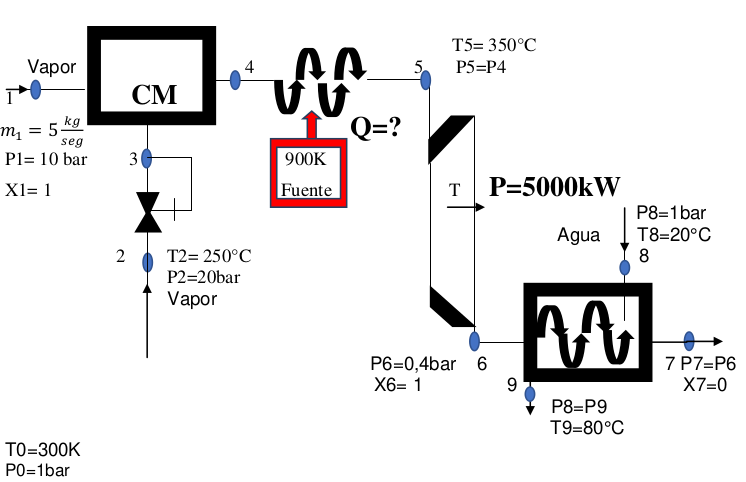

## Solución

### a) $Q$

Necesitamos calcular el flujo másico, de modo que comenzamos por la turbina.

Turbina
$$W = m_5 (h_5 - h_6)$$

En la cámara de mezcla tenemos
$$P_4 = P_3 = P_1$$

Entonces
$$P_5 = P_4$$

$P_5, \; T_5 \qquad \rightarrow \qquad h_5, \; s_5$

$P_6, \; x_6 \qquad \rightarrow \qquad h'_6, \; h''_6, \; s'_6, \; s''_6, \; T_6$

$$h_6 = x_6 (h''_6 - h'_6) + h'_6$$

Despejamos $m_5$
$$m_5 = \frac{W}{h_5 - h_6}$$

Luego
$$m_4 = m_5$$

En la cámara de mezcla tenemos
$$m_4 = m_1 + m_3$$

$$m_4 h_4 = m_1 h_1 + m_3 h_3$$

Despejamos $m_3$
$$m_3 = m_4 - m_1$$

Sabemos que
$$m_2 = m_3$$

$P_1, \; x_1 \qquad \rightarrow \qquad h_1, \; s_1$   
$P_2, \; T_2 \qquad \rightarrow \qquad h_2, \; s_2$    

Para una válvula
$$h_3 = h_2$$

Despejamos $h_4$
$$h_4 = \frac{m_1 h_1 + m_3 h_3}{m_4}$$

Fuente
$$Q = m_4 (h_5 - h_4)$$

---
### b) $\eta_{iso,turbina}$

Para una turbina isoentrópica
$$s_{6rev} = s_5$$

$$x_{6rev} = \frac{s_{6rev} - s'_6}{s''_6 - s'_6}$$

$$h_{6rev} = x_{6rev} (h''_{6rev} - h'_{6rev}) + h'_{6rev}$$

Rendimiento isoentrópico (turbina)
$$\eta_{iso} = \frac{W}{W_{rev}} = \frac{h_5 -h_6}{h_5 - h_{6rev}}$$

---
### c) $\Delta S_u$

$P_1, \; x_1 \qquad \rightarrow \qquad s_1$    
$P_7, \; x_7 \qquad \rightarrow \qquad s_7$     
$P_2, \; T_2 \qquad \rightarrow \qquad s_2$    
$P_8, \; T_8 \qquad \rightarrow \qquad s_8$    
$P_9, \; T_9 \qquad \rightarrow \qquad s_9$    
$P_5, \; T_5 \qquad \rightarrow \qquad s_5$    
$P_4, \; h_4 \qquad \rightarrow \qquad s_4$

Intercambiador de calor
$$m_6 (h_6 - h_7) = m_8(h_9 -h_8)$$

Despejamos $m_8$
$$m_8 = \frac{m_6 (h_6 - h_7)}{h_9 - h_8}$$

Cálculo de entropías
$$\Delta S_{17} = m_1 (s_7 - s_1)$$

$$\Delta S_{27} = m_2 (s_7 - s_2)$$

$$\Delta S_{89} = m_8 (s_9 - s_8)$$

$$\Delta S_f = m_4 (s_5 - s_4)$$

Variación de entropía del universo
$$\Delta S_u = \Delta S_{17} + \Delta S_{27} + \Delta S_{89} + \Delta S_f$$

---
### d) $W_{perdido}$

$$W_{perd} = T_0 \Delta S_u$$

---
### Python

In [ ]:
# Datos:
m_1 =  5 # [kg/s]
P_1 = 10e5 # [Pa]
x_1 = 1
P_2 = 20e5 # [Pa]
T_2 = 250 + 273.15 # [K]
T_5 = 350 + 273.15 # [K]
P_3 = P_4 = P_5 = P_1
W_t = 5000e3 # [W]
P_6 = 0.4e5 # [Pa]
x_6 = 1
P_7 = P_6
x_7 = 0
P_8 = 1e5 # [Pa]
T_8 = 20 + 273.15 # [K]
P_9 = P_8
T_9 = 80 + 273.15 # [K]
T_0 = 300 # [K]
P_0 = 1e5 # [Pa]
T_f = 900 # [K]

In [ ]:
!pip install CoolProp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 42.1 MB/s eta 0:00:00


In [ ]:
import CoolProp.CoolProp as cp

In [ ]:
# Turbina
h_5 = cp.PropsSI('H','P',P_5,'T',T_5,'Water')
s_5 = cp.PropsSI('S','P',P_5,'T',T_5,'Water')

hp_6  = cp.PropsSI('H','P',P_6,'Q',0,'Water')
hpp_6 = cp.PropsSI('H','P',P_6,'Q',1,'Water')
sp_6  = cp.PropsSI('S','P',P_6,'Q',0,'Water')
spp_6 = cp.PropsSI('S','P',P_6,'Q',1,'Water')
T_6   = cp.PropsSI('T','P',P_6,'Q',x_6,'Water')

h_6 = x_6*(hpp_6 - hp_6) + hp_6

In [ ]:
m_5 = W_t/(h_5 - h_6)

In [ ]:
m_4 = m_5
m_3 = m_4 - m_1
m_2 = m_3

In [ ]:
h_1 = cp.PropsSI('H','P',P_1,'Q',1,'Water')
h_2 = cp.PropsSI('H','P',P_2,'T',T_2,'Water')
h_3 = h_2

In [ ]:
h_4 = (m_1*h_1 + m_3*h_3)/m_4

In [ ]:
Q = m_4*(h_5 - h_4)

In [ ]:
print("Q = %.1f [kW]"%(Q/1000))

Q = 3072.0 [kW]


In [ ]:
s_6rev = s_5

x_6rev = (s_6rev - sp_6)/(spp_6 - sp_6)

h_6rev = x_6rev*(hpp_6 - hp_6) + hp_6

η_iso = (h_5 - h_6)/(h_5 - h_6rev)

In [ ]:
η_iso

0.803389143278999

In [ ]:
s_1 = cp.PropsSI('S','P',P_1,'Q',x_1,'Water')
s_7 = cp.PropsSI('S','P',P_7,'Q',x_7,'Water')
s_2 = cp.PropsSI('S','P',P_2,'T',T_2,'Water')
s_8 = cp.PropsSI('S','P',P_8,'T',T_8,'Water')
s_9 = cp.PropsSI('S','P',P_9,'T',T_9,'Water')
s_5 = cp.PropsSI('S','P',P_5,'T',T_5,'Water')
s_4 = cp.PropsSI('S','P',P_4,'H',h_4,'Water')

In [ ]:
cp.PhaseSI('P',P_4,'H',h_4,'Water')

'gas'

In [ ]:
m_6 = m_5
h_7 = cp.PropsSI('H','P',P_7,'Q',x_7,'Water')
h_8 = cp.PropsSI('H','P',P_8,'T',T_8,'Water')
h_9 = cp.PropsSI('H','P',P_9,'T',T_9,'Water')

m_8 = m_6*(h_6 - h_7)/(h_9 - h_8)

In [ ]:
ΔS_17 = m_1*(s_7 - s_1)
ΔS_27 = m_2*(s_7 - s_2)
ΔS_89 = m_8*(s_9 - s_8)
ΔS_f  = Q/T_f

In [ ]:
ΔS_u = ΔS_17 + ΔS_27 + ΔS_89 + (-ΔS_f)

In [ ]:
W_perd = T_0*ΔS_u

In [ ]:
#@title Resultados:
print("Q = %.0f [kW]"%(Q/1000))
print("η_iso = %.3f"%η_iso)
print("ΔS_u = %.5f [kJ/(s·K)]"%(ΔS_u/1000))
print("W_perd = %.2f [kW]"%(W_perd/1000))

Q = 3072 [kW]
η_iso = 0.803
ΔS_u = 12.42359 [kJ/(s·K)]
W_perd = 3727.08 [kW]
